<a href="https://colab.research.google.com/github/alexsandrors91/Cientista_de_dados/blob/master/Mini_projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
import pandas as pd
import numpy as np
import seaborn as sns

#Mini projeto - Roof Imóveis
Roof Imóveis é uma das maiores empresas do ramo imobiliário brasileiro e quer expandir sua área de atuação fazendo um investimento  internacional, com isso, ela contratou voce para uma consultoria estratégicas.
A  empresa irá investir em imóveis no condado de County, nos Estados Unidos.
Utilizando o dataset disponibilizado, voce irá aplicar os conceitos de CRISP-DM aprendisdos até o momento em um projeto prático, que busca desenvolver seu pensamento analitico em um projeto prático, que busca desenvolver seu pensamento análitico, insights e tomada de decisãoes.

#King Country - Condado de King - Washington
 O condado de King é dos 39 condados do estado americano de Washington. A sede e cidade mais populosa do condado é Seattle.
 Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo com o censo nacional de 2020, é o condado mais populoso do estado de 12° mais populoso do país.
 O Dataset apresenta a venda de imóveis e suas características na região de Maio de 2014 á maio de 2015. Tem um total de 21613 registros com um total de 21 atributos.

 Dataset:https://www.kaggle.com/harlfoxem/housesalesprediction

 Dataset detalhado: https://geodacenter.github.io/data-and-lab/KingCountry-HouseSales2015/



#O que devo Fazer?
  A empresa te contratou pois quer saber qual seria os 5 imóveis que ela deveria investir e o porque e quais 5 voce não recomendaria o investimento de jeito nenhum.
  Você deve montar um colab bem redigido mostrando o passo a passo das etapas de análise dio case, fazendo uma introdução e dados atuais sobre o problema. 
  Tambem é importante ressaltar/explicar passagens complexas ou insaghts que você tiver durante a resolução desse projeto. 

# Lendo o dataset

In [279]:

df = pd.read_csv('/content/kc_house_data.csv')
#Usando o pandas para verificar as colunas e os tuipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Renomeando as colunas

In [281]:
df = df.rename(columns = {'date':'Data_de_venda',
                        'price':'Preço_de_venda',
                        'bedrooms':'num_de_quartos',
                        'bathrooms':'num_de_banh',
                        'sqft_living':'area_hab_m²',
                        'sqft_lot':'area_terreno_m²',
                        'floors':'num_de_and',
                        'waterfront':'beira_mar',
                        'view':'vista_boa_(0-4)',
                        'condition':'condição_da_casa_(1-5)',
                        'grade':'q_do_material',
                        'sqft_above':'area_const_acima_solo_m²',
                        'sqft_basement':'area_const_abaixo_solo_m²',
                        'yr_built':'ano_const',
                        'yr_renovated':'ano_rest',
                        'zipcode':'CEP',
                        'lat':'latitude',
                        'long':'longitude'
                        })

In [282]:
df.head()

,id,Data_de_venda,Preço_de_venda,num_de_quartos,num_de_banh,area_hab_m²,area_terreno_m²,num_de_and,beira_mar,vista_boa_(0-4),...,q_do_material,area_const_acima_solo_m²,area_const_abaixo_solo_m²,ano_const,ano_rest,CEP,latitude,longitude,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Tratar datas para formato certo

In [283]:
df['Data_de_venda'] = pd.to_datetime(df.Data_de_venda)
df['Data_de_venda'] = df['Data_de_venda'].dt.strftime('%d/%m/%Y')
df['Preço_de_venda'] = pd.to_numeric(df.Preço_de_venda)
df.head()

,id,Data_de_venda,Preço_de_venda,num_de_quartos,num_de_banh,area_hab_m²,area_terreno_m²,num_de_and,beira_mar,vista_boa_(0-4),...,q_do_material,area_const_acima_solo_m²,area_const_abaixo_solo_m²,ano_const,ano_rest,CEP,latitude,longitude,sqft_living15,sqft_lot15
0,7129300520,13/10/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,09/12/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,25/02/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,09/12/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,18/02/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Removendo nulos e duplicados se tiverem

In [284]:
df = df.dropna(axis=1, how='all')
df = df.drop_duplicates(keep='last')
df = df.drop(["sqft_living15","sqft_lot15","num_de_and","latitude","longitude","area_const_acima_solo_m²","area_const_abaixo_solo_m²"],axis=1)


#Analisando dados

In [285]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21613 non-null  int64  
 1   Data_de_venda           21613 non-null  object 
 2   Preço_de_venda          21613 non-null  float64
 3   num_de_quartos          21613 non-null  int64  
 4   num_de_banh             21613 non-null  float64
 5   area_hab_m²             21613 non-null  int64  
 6   area_terreno_m²         21613 non-null  int64  
 7   beira_mar               21613 non-null  int64  
 8   vista_boa_(0-4)         21613 non-null  int64  
 9   condição_da_casa_(1-5)  21613 non-null  int64  
 10  q_do_material           21613 non-null  int64  
 11  ano_const               21613 non-null  int64  
 12  ano_rest                21613 non-null  int64  
 13  CEP                     21613 non-null  int64  
dtypes: float64(2), int64(11), object(1)
me

In [286]:
df = df.sort_values('Data_de_venda',ascending = False)

In [304]:
df = df.sort_values(['condição_da_casa_(1-5)','vista_boa_(0-4)'],ascending = False)


In [306]:
df.head(5)

,id,Data_de_venda,Preço_de_venda,num_de_quartos,num_de_banh,area_hab_m²,area_terreno_m²,beira_mar,vista_boa_(0-4),condição_da_casa_(1-5),q_do_material,ano_const,ano_rest,CEP
14682,7278100515,21/08/2014,1295000.0,2,2.50,2910,19449,1,4,5,9,1985,0,98177
18992,7856400300,22/03/2015,1505000.0,2,2.50,3180,9400,0,4,5,10,1985,0,98006
264,2123039032,27/10/2014,369900.0,1,0.75,760,10079,1,4,5,5,1936,0,98070
7203,2927600630,16/04/2015,995000.0,4,3.50,2780,9550,0,4,5,10,1978,0,98166
13573,1251200155,11/09/2014,1000000.0,4,3.50,2990,4200,0,4,5,9,1925,0,98144


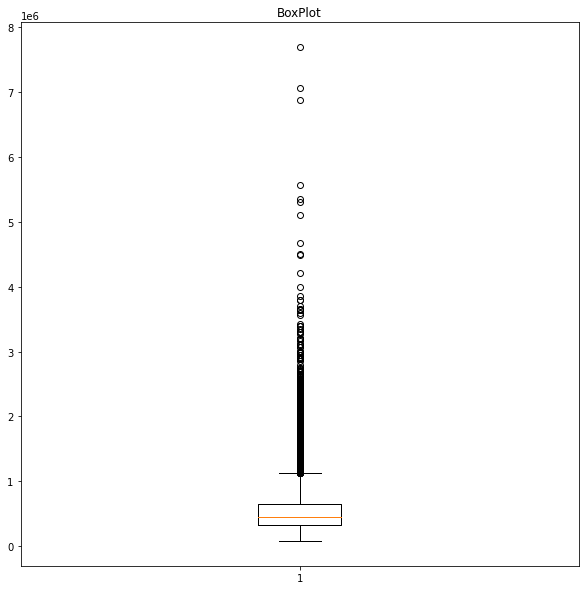

In [326]:
import matplotlib.pyplot as plt


#tamanho da figura
plt.figure(figsize = (10,10))
#define X e o boxplot
plt.boxplot(df['Preço_de_venda'])
whiskerprops={"color": "Blue", "linewidth": 1.5}
capprops={"color": "C0", "linewidth": 1.5}     
#define título
plt.title('BoxPlot')
#faz a plotagem
plt.show()